Learn to predict the number of real solutions of the tritangent circles to three conics.

In [22]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [23]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
data = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,B4,B5,B6,C1,C2,C3,C4,C5,C6,Counts
0,0.080945,0.360232,0.057056,0.749259,0.955720,0.807542,0.632065,0.987198,0.858777,0.747515,...,1.009519,0.753096,0.486770,-0.004601,0.190029,0.265888,0.167961,0.726625,0.297465,26
1,0.020657,0.528250,0.785039,0.140394,0.629471,0.232232,0.442754,0.177439,0.541098,0.378114,...,0.461198,0.016416,0.170428,0.486811,0.728032,0.885663,0.050032,0.648216,0.157806,0
2,0.524718,0.271188,0.617312,0.352435,0.446476,0.870586,0.790443,0.930621,0.314740,0.650593,...,0.638183,0.010259,-0.030974,0.778479,1.059313,0.434567,0.503703,0.603667,0.192912,10
3,0.391623,0.766953,0.151090,0.986174,0.769373,0.199420,0.685867,0.058377,0.051811,0.073706,...,0.064034,0.401679,0.929817,0.090694,0.480075,0.301884,0.614086,0.812183,0.725908,20
4,0.914580,0.289532,0.338711,0.269049,0.688129,0.896449,0.850288,0.451521,0.327267,0.763946,...,0.408069,0.124350,-0.231770,0.388754,0.696648,0.785599,0.885972,0.387142,0.583846,8


In [24]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)/2
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [25]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=300, activation='sigmoid', input_shape=(18,)),
    keras.layers.Dense(units=300, activation='sigmoid'),
    keras.layers.Dense(units=300, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='relu')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               5700      
_________________________________________________________________
dense_9 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_10 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 301       
Total params: 186,601
Trainable params: 186,601
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam', 
              loss='mse',
              metrics=['mae', 'mse'])

In [27]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=100,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 - 218s - loss: 18.9257 - mae: 3.3163 - mse: 18.9257 - val_loss: 16.6179 - val_mae: 3.1126 - val_mse: 16.6179
Epoch 2/100
80000/80000 - 113s - loss: 16.7162 - mae: 3.1169 - mse: 16.7162 - val_loss: 17.0747 - val_mae: 3.1359 - val_mse: 17.0747
Epoch 3/100
80000/80000 - 120s - loss: 16.6622 - mae: 3.1116 - mse: 16.6622 - val_loss: 16.4977 - val_mae: 3.0921 - val_mse: 16.4977
Epoch 4/100
80000/80000 - 704s - loss: 16.6132 - mae: 3.1085 - mse: 16.6133 - val_loss: 16.4787 - val_mae: 3.0911 - val_mse: 16.4787
Epoch 5/100
80000/80000 - 175s - loss: 16.5550 - mae: 3.1039 - mse: 16.5550 - val_loss: 16.3652 - val_mae: 3.0815 - val_mse: 16.3652
Epoch 6/100
80000/80000 - 21s - loss: 16.4065 - mae: 3.0916 - mse: 16.4065 - val_loss: 16.5610 - val_mae: 3.0945 - val_mse: 16.5610
Epoch 7/100
80000/80000 - 18s - loss: 16.2404 - mae: 3.0740 - mse: 16.2404 - val_loss: 16.2767 - val_mae: 3.0720 - val_mse: 16.2767
Epoch 8/100
80000/800

[]

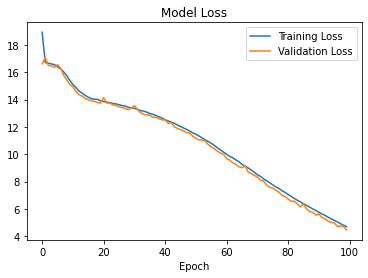

In [28]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

In [29]:
# data = data.drop('predictions', axis=1)
predictions = 2*np.round(model.predict(param))
data.insert(19, 'predictions', predictions)

<AxesSubplot:>

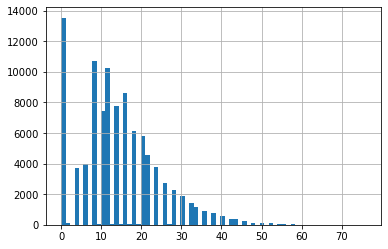

In [30]:
data.counts.hist(bins=69)

<AxesSubplot:>

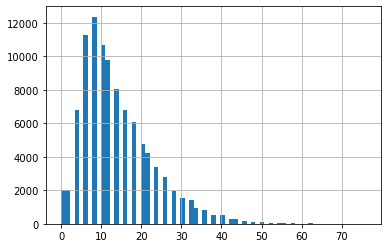

In [31]:
data.predictions.hist(bins=69)

In [33]:
pred_val = 2*np.round(model.predict(param_val)).reshape(1,-1)
k = 0
for val in pred_val[0] - 2*count_val:
    if val == 0:
        k+=1
print(f"Accuracy = {k/20000}")

Accuracy = 0.2245
